In [1]:
import pandas as pd
import seaborn as sns

#### Features
<b>1. age |</b> Number of years a person has lived <br>
<b>2. sex |</b> Gender of patient (Male:1/Female:0)  <br>
<b>3. cp | </b> Chest Pain type (4 values) <br>
<b>4. trestbps |</b> Resting Blood Pressure <br>
<b>5. chol |</b> serum cholestoral in mg/dl <br>
<b>6. fbs |</b> Fasting Blood Sugar > 120 mg/dl <br>
<b>7. restecg |</b> Resting Electrocardiographic (ECG) results (values 0,1,2) <br>
<b>8. thalach |</b> Maximum Heart Rate Achieved <br>
<b>9. exang |</b> Exercise Induced Angina <br>
<b>10. oldpeak |</b> oldpeak = ST depression induced by exercise relative to rest <br>
<b>11. slope |</b> the slope of the peak exercise ST segment <br>
<b>12. ca |</b> number of major vessels (0-3) colored by flourosopy <br>
<b>13. thal |</b> Thalium stress test results: 3 = normal; 6 = fixed defect; 7 = reversable defect 

#### Target variable `condition`: diagnosis of heart disease (angiographic disease status)**
- Value 0: < 50% diameter narrowing (negative for disease)
- Value 1: > 50% diameter narrowing (positive for disease)

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [6]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

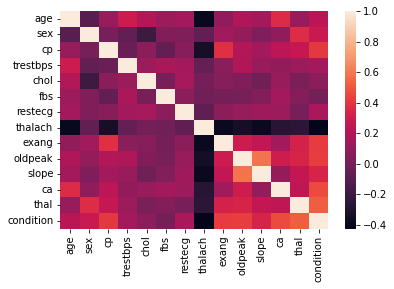

In [7]:
sns.heatmap(df.corr());

In [8]:
df.nunique(0)

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

### Conclusion about dataset.
There aren't any `nan` values, target variable is well balanced. So we can use Accuracy as a metric for classification problem.


We can divide features into two groups:
- numeric: `age`, `trestbps`, `chol`, `thalach`, `oldpeak`.
- categorical: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

RANDOM_SEED = 17

In [18]:
X, y = df.drop(['condition'], axis=1), df.condition.values

In [27]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipe_lr = Pipeline([
    ('prep', preprocessor),
    ('lr', LogisticRegression(random_state=RANDOM_SEED, n_jobs=-1))
])

pipe_lr

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('lr', LogisticRegression(n_jobs=-1, random_state=17))])

In [28]:
cvs = cross_val_score(pipe_lr, X, y, cv=5, n_jobs=-1, error_score='raise')
cvs.mean()

0.801638418079096

In [29]:
pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('lr', RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=-1))
])
cvs = cross_val_score(pipe_rf, X, y, cv=5, n_jobs=-1, error_score='raise')
cvs.mean()

0.7478531073446328

### `LogisticRegression` will be used as a model.